# This is for analysis of the asynchronous and synchronous Gremlin runs

* Get the times for work vs. idle times by asynchronous vs. synchronous runs for Gremlin
* Get the total time start of first evaluation to the end of the last evaluation by run type
* Show the durations shorten over time as we converge

In [9]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

import seaborn as sns

In [10]:
rundata = pd.read_csv('gremlin_async_and_sync.csv')

In [11]:
rundata

,run,hostname,pid,uuid,birth_id,scenario,cloudiness,wetness,precipitation,precipitation_deposits,...,fog_density,fog_distance,sun_azimuth_angle,sun_altitude_angle,start_eval_time,stop_eval_time,fitness,job_id,run_type,generation
0,3,d36n08,105620,eaa6d360-751a-4536-9ee7-6ecceffaf759,26,14,8,49,50,50,...,12,1.560000,123,10,1.622667e+09,1.622667e+09,18.441713,1051001,async,NaN
1,3,d36n01,24482,3403baac-6418-4c4a-a063-b478c5f98fd9,42,13,89,16,25,75,...,37,719.575940,306,-42,1.622667e+09,1.622667e+09,63.508626,1051001,async,NaN
2,3,d36n07,170330,b01e7cac-eb6c-4d37-9805-c44298aa5706,37,36,49,20,50,75,...,21,15.777216,77,17,1.622667e+09,1.622667e+09,99.302382,1051001,async,NaN
3,3,d36n01,24466,102e48ba-c110-4f6e-bdbf-3cd8c563c8c5,43,25,60,46,50,0,...,38,9.485760,318,72,1.622667e+09,1.622667e+09,47.844071,1051001,async,NaN
4,3,d36n02,45849,8bb41025-7261-43c7-8b56-37bf88afb26d,8,38,51,34,50,0,...,46,1843.674407,336,43,1.622667e+09,1.622667e+09,77.942178,1051001,async,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,g17n18,26350,c526bd23-be9d-4386-b194-01d0c90715d8,595,4,82,32,25,0,...,80,41.949673,318,-57,1.623170e+09,1.623170e+09,10.880190,1064207,sync,9.0
5996,0,g18n02,163154,7ce91453-e742-4ee0-85d1-8a1ba89a081e,596,5,100,69,0,100,...,62,1151.921505,132,15,1.623170e+09,1.623170e+09,15.307622,1064207,sync,9.0
5997,0,g18n02,163158,d14983f6-c7c0-4879-af27-7784b34428fa,597,4,82,32,50,0,...,80,41.949673,318,-56,1.623170e+09,1.623170e+09,11.266799,1064207,sync,9.0
5998,0,g18n02,163150,ade423a4-54cc-4cca-b79e-ab9d7d97c54a,598,4,100,67,0,100,...,62,719.575940,132,15,1.623170e+09,1.623170e+09,11.213852,1064207,sync,9.0


In [12]:
## Relationship of evaluation times over the course of a run
rundata['duration'] = rundata['stop_eval_time'] - rundata['start_eval_time']

<IPython.core.display.Javascript object>


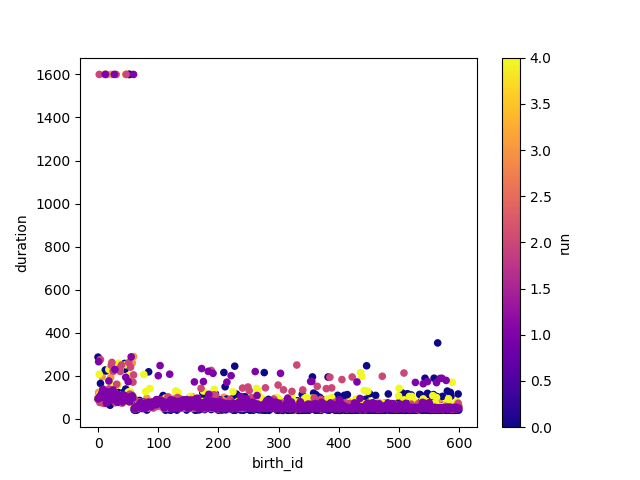

<IPython.core.display.Javascript object>


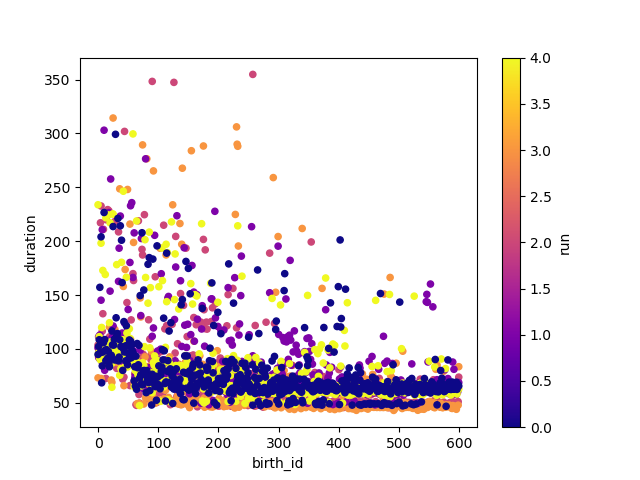

run_type
async    AxesSubplot(0.125,0.11;0.62x0.77)
sync     AxesSubplot(0.125,0.11;0.62x0.77)
dtype: object

In [27]:
rundata.groupby('run_type').plot.scatter('birth_id', 'duration', c='run', colormap='plasma')

## Getting the total run evaluation times 

We would normally use the wall clock times, but the runs used the full batch job budget, so that approach is not an option.  (They generally finished before the wall clock time, but the way the various scripts are configured, bash `wait` statements keep the jobs for terminating. There should be a way to refactor those scripts such that the jobs will finish when the last EA puython script finishes, but that will have to await another time.)

So, we want `max(stop_eval_time) - min(start_eval_time)` by `run` and then by `run_type`.

In [5]:
by_run_and_type = rundata.groupby(['run_type','run'])

In [10]:
run_durations = by_run_and_type.agg({'start_eval_time' : min, 'stop_eval_time' : max})

In [12]:
run_durations

start_eval_time  stop_eval_time
run_type run                                 
async    0       1.622667e+09    1.622669e+09
         1       1.622667e+09    1.622669e+09
         2       1.622667e+09    1.622669e+09
         3       1.622667e+09    1.622669e+09
         4       1.622667e+09    1.622669e+09
sync     0       1.623168e+09    1.623170e+09
         1       1.623168e+09    1.623170e+09
         2       1.623168e+09    1.623170e+09
         3       1.623168e+09    1.623171e+09
         4       1.623168e+09    1.623170e+09

In [13]:
run_durations['duration_secs'] = run_durations['stop_eval_time'] - run_durations['start_eval_time']

In [15]:
run_durations['duration_hrs'] = run_durations['duration_secs'] / 60 / 60

In [16]:
run_durations

start_eval_time  stop_eval_time  duration_secs  duration_hrs
run_type run                                                              
async    0       1.622667e+09    1.622669e+09    1601.573439      0.444882
         1       1.622667e+09    1.622669e+09    1601.362803      0.444823
         2       1.622667e+09    1.622669e+09    1601.596051      0.444888
         3       1.622667e+09    1.622669e+09    1602.899437      0.445250
         4       1.622667e+09    1.622669e+09    1600.138789      0.444483
sync     0       1.623168e+09    1.623170e+09    1799.093385      0.499748
         1       1.623168e+09    1.623170e+09    1927.392843      0.535387
         2       1.623168e+09    1.623170e+09    2012.527075      0.559035
         3       1.623168e+09    1.623171e+09    2231.957891      0.619988
         4       1.623168e+09    1.623170e+09    1802.355428      0.500654

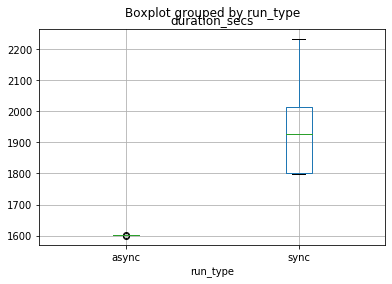

In [17]:
run_durations.boxplot(column=['duration_secs'], by='run_type')

## Getting work vs. idle times by run type

Each dask worker has an UUID, but we don't capture that, so we have to rely on concatenating the hostname and process ID (pid) to make a unique identifier that we'll later group by.

In [5]:
rundata['worker_id'] = rundata['hostname'] + rundata['pid'].astype(str)

In [6]:
# Turn the NaNs to zeros so we can at least count them
rundata['fitness'] = rundata['fitness'].fillna(0)

In [7]:
# group by the worker id so we can extract the start/stop times for that worker
by_worker = rundata.groupby('worker_id') 

In [8]:
# Dictionary keyed by worker id that will contain a list of start/stop times for each of them
worker_time_series = {} 

for name, group in by_worker:
    print(name)
    
    # We will serialize the start/stop times in 'times'; later, we'll add a sibling key to categorize each interval
    # and track their lengths.
    worker_time_series[name] = {'times' : [], 'run_type' : group['run_type'].iloc[0]}
    
    for start, stop in zip(group['start_eval_time'], group['stop_eval_time']):
        print(f'{start} {stop}')
        worker_time_series[name]['times'].append(start)
        worker_time_series[name]['times'].append(stop)

d13n1498578
1622667374.0087595 1622668974.0542214
d13n1498582
1622667373.5855114 1622668973.658787
d13n1498586
1622667373.60765 1622667602.5223696
1622667602.56624 1622667676.6529849
1622667676.6925411 1622667780.715092
1622667780.752449 1622667828.2910352
1622667828.3516502 1622667877.3236554
1622667877.3614385 1622667925.6013756
1622667927.3369114 1622667973.644244
1622667973.6842706 1622668021.0930545
1622668021.131532 1622668068.8906224
d13n1498590
1622667373.8118734 1622667483.7105105
1622667483.7442436 1622667684.2258306
1622667684.2748902 1622667768.2763445
1622667768.3178384 1622667823.436623
1622667823.4764605 1622667878.297618
1622667878.3348944 1622667931.417156
1622667931.4548686 1622667976.8308418
1622667976.871036 1622668024.8734407
1622668024.9130974 1622668071.763902
d13n1498594
1622667374.0545244 1622667472.4578755
1622667472.491603 1622667524.1049347
1622667524.1418793 1622667569.633916
1622667569.672808 1622667641.6272357
1622667641.663481 1622667708.6996439
16226677

1623169960.9669163 1623170026.2065446
1623170104.7243705 1623170171.581659
g16n0993514
1623168397.0748513 1623168505.5564766
1623168695.3593152 1623168769.9719667
1623168903.43278 1623169027.761885
1623169084.909694 1623169166.4887688
1623169264.0971394 1623169312.8040085
1623169437.6737616 1623169591.805308
1623169607.8026035 1623169676.754452
1623169809.2660382 1623169874.9617324
1623169960.9673035 1623170028.4418435
1623170104.7229652 1623170174.1840372
g16n0993518
1623168397.0816894 1623168477.1956055
1623168695.3597193 1623168762.260886
1623168903.4351745 1623168965.6084785
1623169084.9065485 1623169165.039533
1623169264.0964954 1623169378.4016864
1623169437.6750972 1623169509.7577245
1623169607.8019366 1623169656.1932616
1623169809.2671824 1623169858.75473
1623169960.9676278 1623170008.7374053
1623170104.7245202 1623170165.1272755
g16n0993522
1623168397.077322 1623168525.988259
1623168695.3582346 1623168754.8056686
1623168903.433566 1623168965.1797194
1623169084.9074247 162316920

1622668036.042457 1622668090.8325875
h09n1074152
1622667376.3270938 1622667469.1626847
1622667469.1968553 1622667531.176987
1622667531.2175815 1622667602.6317472
1622667602.6715446 1622667731.9699426
1622667732.009685 1622667784.9241054
1622667784.9639244 1622667836.0160089
1622667836.053279 1622667889.942656
1622667889.9809208 1622668104.6206706
h09n1074156
1622667376.383805 1622667635.021978
1622667635.0738142 1622667708.0154119
1622667708.059947 1622667849.4901054
1622667849.53091 1622667901.6472082
1622667901.6863716 1622667956.0615675
1622667956.1047616 1622668098.157814
h09n1074160
1622667376.3595846 1622667485.129094
1622667485.163328 1622667561.0983994
1622667561.1377518 1622667613.1477952
1622667613.1849024 1622667663.1844893
1622667663.2221544 1622667789.049216
1622667789.0893269 1622667842.0188382
1622667842.0565019 1622667941.0847847
1622667941.1249998 1622667990.5131953
1622667990.5511274 1622668043.2231948
1622668043.2634091 1622668097.8424249
h09n1193459
1622667376.50109

In [9]:
# Now lets convert that time series data to actual times series data format
for worker_id in worker_time_series.keys():
    # First we convert to a Series so that when we next convert to datetime it will return that as a series
    # instead of a DatetimeIndex.  We don't want an index, we want a Series so that we have access to 
    # rolling(), which does not exist for DatetimeIndex objects.
    worker_time_series[worker_id]['times'] = pd.Series(worker_time_series[worker_id]['times'])
    
    # Commented out the following because we just want to use subtract and that's not allowed on time series
    # worker_time_series[worker_id]['times'] = pd.to_datetime(worker_time_series[worker_id]['times'], unit='s')
    
    # Now compute the duration for each interval
    worker_time_series[worker_id]['durations'] = worker_time_series[worker_id]['times'].rolling(2).apply(lambda x: x[1] - x[0], raw=True)
    
    # Extract the durations for just when we were busy
    worker_time_series[worker_id]['work_durations'] = worker_time_series[worker_id]['durations'][1::2]
    worker_time_series[worker_id]['work_durations_total'] = worker_time_series[worker_id]['work_durations'].sum()
    
    # And then extract the idle time durations
    worker_time_series[worker_id]['idle_durations'] = worker_time_series[worker_id]['durations'][::2]
    worker_time_series[worker_id]['idle_durations_total'] = worker_time_series[worker_id]['idle_durations'].sum()
    

In [10]:
worker_time_series

{'d13n1498578': {'times': 0    1.622667e+09
  1    1.622669e+09
  dtype: float64,
  'run_type': 'async',
  'durations': 0            NaN
  1    1600.045462
  dtype: float64,
  'work_durations': 1    1600.045462
  dtype: float64,
  'work_durations_total': 1600.0454618930817,
  'idle_durations': 0   NaN
  dtype: float64,
  'idle_durations_total': 0.0},
 'd13n1498582': {'times': 0    1.622667e+09
  1    1.622669e+09
  dtype: float64,
  'run_type': 'async',
  'durations': 0            NaN
  1    1600.073276
  dtype: float64,
  'work_durations': 1    1600.073276
  dtype: float64,
  'work_durations_total': 1600.073275566101,
  'idle_durations': 0   NaN
  dtype: float64,
  'idle_durations_total': 0.0},
 'd13n1498586': {'times': 0     1.622667e+09
  1     1.622668e+09
  2     1.622668e+09
  3     1.622668e+09
  4     1.622668e+09
  5     1.622668e+09
  6     1.622668e+09
  7     1.622668e+09
  8     1.622668e+09
  9     1.622668e+09
  10    1.622668e+09
  11    1.622668e+09
  12    1.622668e+0

In [16]:
worker_time_df = pd.DataFrame.from_dict(worker_time_series, orient='index')

In [17]:
worker_time_df

,times,run_type,durations,work_durations,work_durations_total,idle_durations,idle_durations_total
d13n1498578,0 1.622667e+09 1 1.622669e+09 dtype: flo...,async,0 NaN 1 1600.045462 dtype: float64,1 1600.045462 dtype: float64,1600.045462,0 NaN dtype: float64,0.000000
d13n1498582,0 1.622667e+09 1 1.622669e+09 dtype: flo...,async,0 NaN 1 1600.073276 dtype: float64,1 1600.073276 dtype: float64,1600.073276,0 NaN dtype: float64,0.000000
d13n1498586,0 1.622667e+09 1 1.622668e+09 2 1....,async,0 NaN 1 228.914720 2 0.04...,1 228.914720 3 74.086745 5 104.02...,693.249750,0 NaN 2 0.043870 4 0.039556 6...,2.033222
d13n1498590,0 1.622667e+09 1 1.622667e+09 2 1....,async,0 NaN 1 109.898637 2 0.03...,1 109.898637 3 200.481587 5 84.00...,697.633065,0 NaN 2 0.033733 4 0.049060 6...,0.318964
d13n1498594,0 1.622667e+09 1 1.622667e+09 2 1....,async,0 NaN 1 98.403351 2 0.03372...,1 98.403351 3 51.613332 5 45.49203...,719.603473,0 NaN 2 0.033727 4 0.036945 6...,0.435608
...,...,...,...,...,...,...,...
h27n0722645,0 1.622667e+09 1 1.622667e+09 2 1....,async,0 NaN 1 95.432884 2 0.03...,1 95.432884 3 48.067631 5 77.60...,709.138552,0 NaN 2 0.031888 4 0.033911 6...,0.373268
h27n0722649,0 1.622667e+09 1 1.622668e+09 2 1....,async,0 NaN 1 134.278195 2 0.03...,1 134.278195 3 73.509934 5 48.22...,711.944177,0 NaN 2 0.036724 4 0.036153 6...,0.409059
h27n0722653,0 1.622667e+09 1 1.622667e+09 2 1....,async,0 NaN 1 113.774472 2 0.05...,1 113.774472 3 86.456760 5 56.13...,730.590712,0 NaN 2 0.050254 4 0.037076 6...,0.416134
h27n0722657,0 1.622667e+09 1 1.622667e+09 2 1....,async,0 NaN 1 99.988094 2 0.03442...,1 99.988094 3 70.969064 5 51.91314...,695.002129,0 NaN 2 0.034421 4 0.065876 6...,6.252839


In [22]:
# Just a sanity check to ensure that we have data for 300 workers for each run.
worker_time_df.run_type.value_counts()

sync     300
async    300
Name: run_type, dtype: int64

In [24]:
worker_time_df.columns

Index(['times', 'run_type', 'durations', 'work_durations',
       'work_durations_total', 'idle_durations', 'idle_durations_total'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f81044feb00>,
      dtype=object)

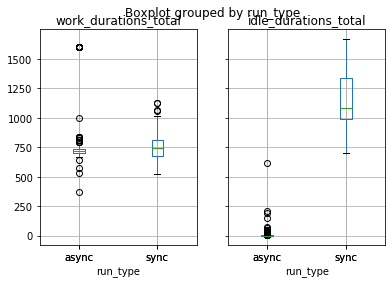

In [26]:
worker_time_df.boxplot(column=['work_durations_total', 'idle_durations_total'], by='run_type')